In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


In [56]:
data = pd.read_csv('dados_rpm_10_modificado.csv')

In [57]:
resposta = data['rpm']

In [58]:
freq_de_corte = 0.1 # Ajuste conforme necessário
ordem = 2

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, resposta)
resposta_filtrada = pd.DataFrame(resposta_filtrada)
resposta_filtrada.head()
print(resposta_filtrada.iloc[300:1400].max(), resposta_filtrada.iloc[300:1400].min())

0    1832.632547
dtype: float64 0    1356.867901
dtype: float64


In [59]:
# Frequência de amostragem (baudrate)
sampling_freq = 115200.0

# Calcula o tempo de coleta de cada amostra
tempo_de_coleta = np.array(pd.read_csv('tempo_de_coleta_10hz.csv'))
print(tempo_de_coleta)

[[0.00000000e+00]
 [8.68055556e-06]
 [1.73611111e-05]
 ...
 [9.52256944e-03]
 [9.53125000e-03]
 [9.53993056e-03]]


In [60]:
tensao = pd.read_csv('dados_senoide_10hz.csv')

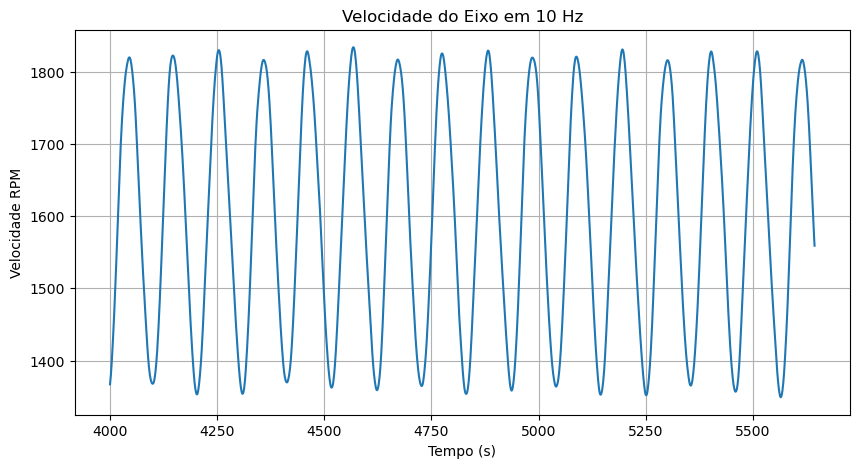

In [61]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(resposta_filtrada.iloc[4000:6000])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 10 Hz')
plt.grid()
plt.show()

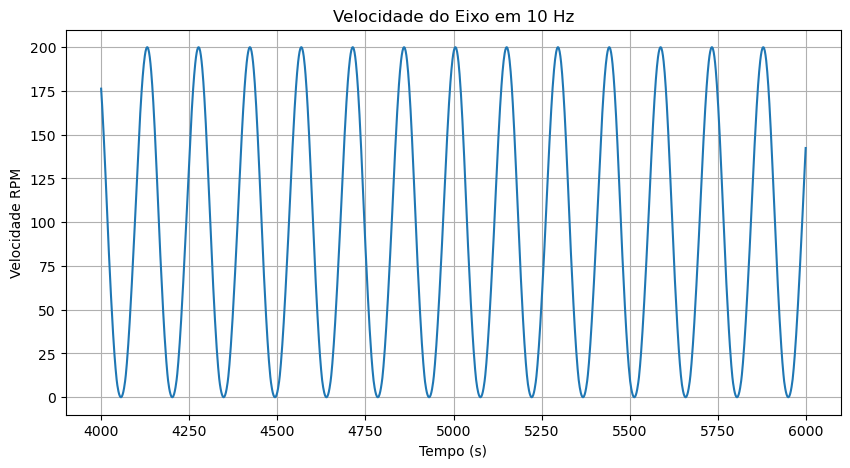

In [62]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(tensao['tensao'].iloc[4000:6000])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 10 Hz')
plt.grid()
plt.show()

In [63]:
print(resposta_filtrada.values.flatten())

[  -4.18031106   10.30026726   25.41976694 ... 1581.7782527  1570.02318927
 1558.94934533]


In [64]:
amostras = resposta_filtrada.values.flatten()
num_amostras = len(amostras)

In [65]:
import numpy as np
from scipy.signal import find_peaks

# Encontrar os índices dos picos positivos da senoide
peaks, _ = find_peaks(amostras)
# Calcular o número médio de amostras entre os picos
num_amostras_por_ciclo = np.mean(np.diff(peaks))

# A frequência de amostragem é o número de amostras por ciclo vezes a frequência da senoide
Fs = num_amostras_por_ciclo * 10
print(f"Frequência de amostragem estimada: {Fs} Hz")


Frequência de amostragem estimada: 1046.7924528301887 Hz


In [66]:
print(resposta_filtrada.max(), resposta_filtrada.min())

0    1834.965102
dtype: float64 0   -4.180311
dtype: float64


In [67]:
t = np.arange(0, num_amostras / Fs, 1 / Fs)
t = np.array(t)
t = pd.DataFrame(t)

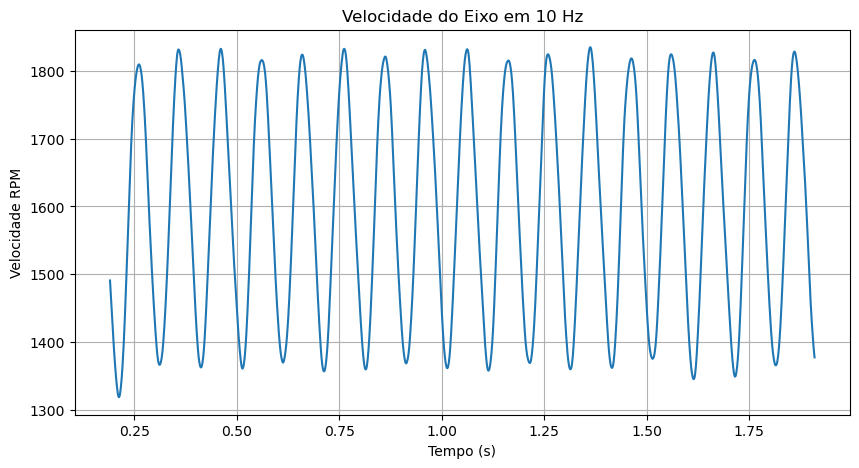

In [68]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(t.iloc[200:2000], resposta_filtrada.iloc[200:2000])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 10 Hz')
plt.grid()
plt.show()